<a href="https://colab.research.google.com/github/paulbright/Python/blob/master/test_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


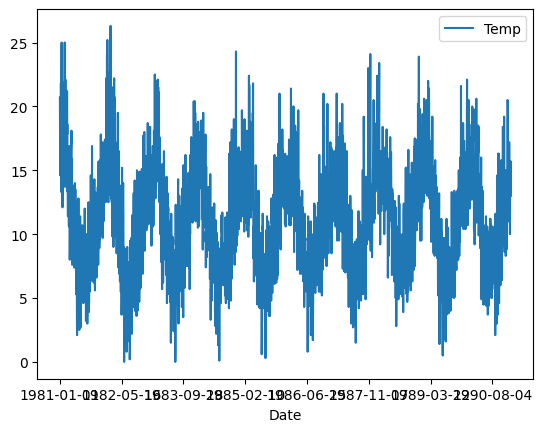

In [ ]:
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
# load the dataset and print the first 5 rows
series = read_csv('sample_data/daily-min-temperatures.csv', header=0, index_col=0)
print(series.head())
# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))

series.plot()
pyplot.show()



In [ ]:
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
 print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
 print(inversed[i])

Min: 0.000000, Max: 26.300000
[0.78707224]
[0.68060837]
[0.7148289]
[0.55513308]
[0.60076046]
[20.7]
[17.9]
[18.8]
[14.6]
[15.8]


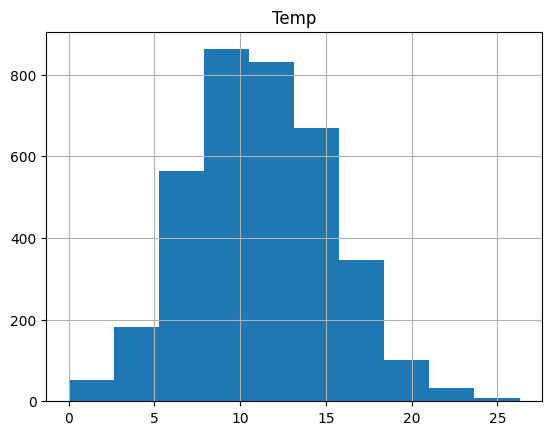

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('sample_data/daily-min-temperatures.csv', header=0, index_col=0)
series.hist()
pyplot.show()

In [ ]:
!pip install pandas_datareader requests


200
{'page': 1, 'pages': 1, 'per_page': '500', 'total': 297}
['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAF', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MNP', 

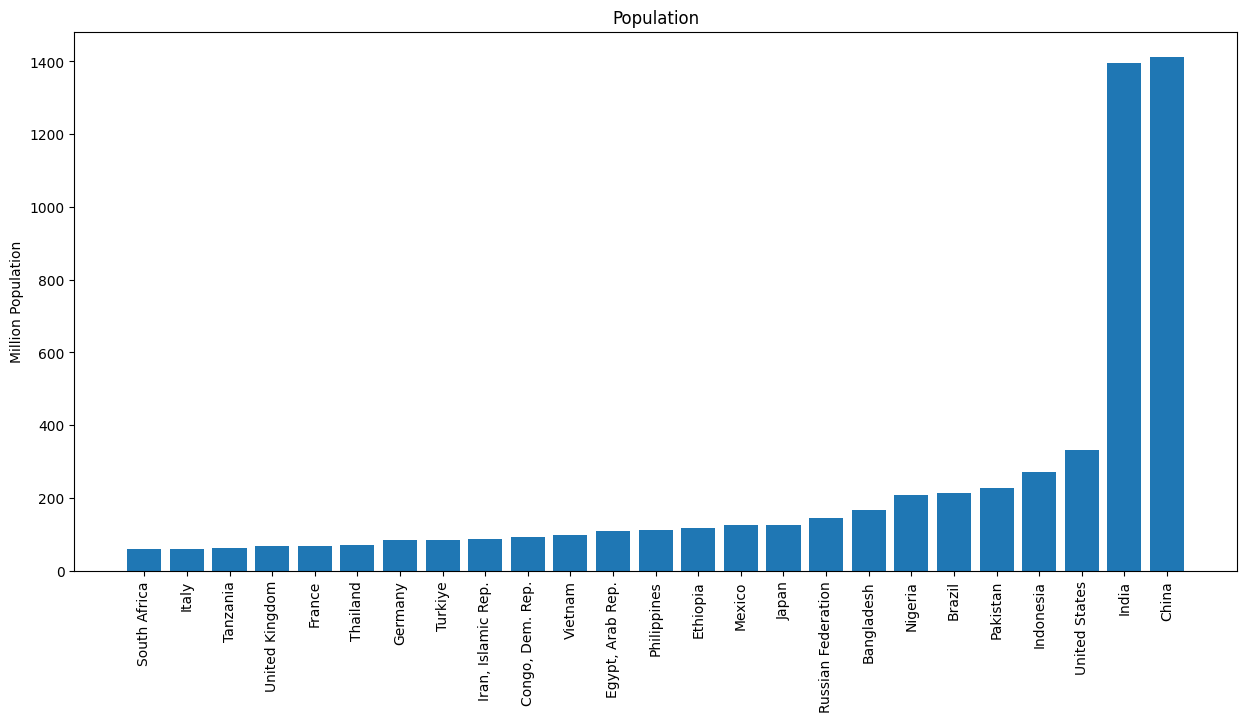

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests


# Create query URL for list of countries, by default only 50 entries returned per page
url = "http://api.worldbank.org/v2/country/all?format=json&per_page=500"
response = requests.get(url)
# Expects HTTP status code 200 for correct query
print(response.status_code)
# Get the response in JSON
header, data = response.json()
print(header)
# Collect a list of 3-letter country code excluding aggregates
countries = [item["id"]
             for item in data
             if item["region"]["value"] != "Aggregates"]
print(countries)


# Create query URL for total population from all countries in 2020
arguments = {
    "country": "all",
    "indicator": "SP.POP.TOTL",
    "date": 2020,
    "format": "json"
}
url = "http://api.worldbank.org/v2/country/{country}/" \
      "indicator/{indicator}?date={date}&format={format}&per_page=500"
query_population = url.format(**arguments)
response = requests.get(query_population)
print(response.status_code)
# Get the response in JSON
header, population_data = response.json()
print(header)


# Filter for countries, not aggregates
population = []
for item in population_data:
    if item["countryiso3code"] in countries:
        name = item["country"]["value"]
        population.append({"country":name, "population": item["value"]})
# Create DataFrame for sorting and filtering
population = pd.DataFrame.from_dict(population)
population = population.dropna().sort_values("population").iloc[-25:]
# Plot bar chart
fig = plt.figure(figsize=(15,7))
plt.bar(population["country"], population["population"]/1e6)
plt.xticks(rotation=90)
plt.ylabel("Million Population")
plt.title("Population")
plt.show()




In [40]:
import pandas as pd
import numpy as np
from datetime import datetime

dates = pd.date_range("2023-11-01", "2023-11-30", freq="D")
a_data =  np.random.uniform(low=95, high=99.8, size=(30,))
b_data =  np.random.uniform(low=90, high=96, size=(30,))
p_data =  np.random.uniform(low=80, high=91, size=(30,))

data =  np.dstack([a_data,b_data,p_data])[0]
# o_data = np.random.uniform(low=95, high=99.8, size=(30, 3))
df = pd.DataFrame(data, index=dates, columns=("FRSL_A", "FRSL_B", "FRSL_P"))





In [39]:
data[0]



array([[96.26148576, 94.03538508, 88.97631874],
       [98.5641607 , 90.82540779, 88.15803537],
       [98.10736181, 90.91966172, 90.44675442],
       [97.228263  , 90.15907033, 90.79096133],
       [98.21199787, 91.08882309, 83.70032505],
       [96.03870379, 92.96244622, 84.83838616],
       [98.43850694, 92.2975911 , 89.98083989],
       [97.21929929, 93.96591775, 84.85730383],
       [98.57417644, 90.64768466, 87.51454903],
       [97.66950199, 93.46292333, 88.08064054],
       [96.08328497, 93.66724893, 80.27028391],
       [97.97502994, 95.38977404, 80.95765165],
       [97.87448909, 91.33305658, 83.32018422],
       [96.72001067, 94.87809424, 90.74627272],
       [96.52603715, 95.61616564, 83.9524477 ],
       [95.22716853, 93.61792622, 89.88611042],
       [95.72965455, 93.0369916 , 80.23326355],
       [97.66041245, 91.56497174, 89.85493758],
       [99.59917234, 90.99944367, 90.45832207],
       [98.99695593, 93.60518384, 87.12056199],
       [98.37606098, 90.24843632, 87.282

In [41]:
df.head()


,FRSL_A,FRSL_B,FRSL_P
2023-11-01,95.771425,91.657388,82.685036
2023-11-02,99.055037,92.694833,87.601109
2023-11-03,96.778401,92.396104,90.435831
2023-11-04,98.077594,91.418921,80.320146
2023-11-05,98.225586,90.699147,83.778015


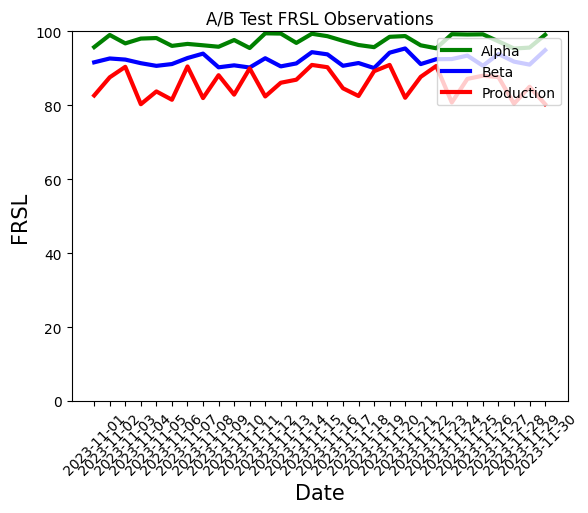

In [49]:
import matplotlib
import matplotlib.pyplot as plt

plt.title("A/B Test FRSL Observations")
plt.plot(df.index, df['FRSL_A'], color='green', linewidth=3, label="Alpha")
plt.plot(df.index, df['FRSL_B'], color='blue', linewidth=3,  label="Beta")
plt.plot(df.index, df['FRSL_P'], color='red', linewidth=3,  label="Production")

ax = plt.gca()
ax.set_ylim([0, 100])

plt.xlabel('Date', fontsize=15)
plt.ylabel('FRSL', fontsize=15)

ticks = list(df.index)
plt.xticks(ticks, rotation=45)
plt.legend(loc="upper right")
